In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("parking.xlsx")

In [3]:
data

,Date,Day,Time,Bike,T.Wheel,Car,Bus/lorry,Section
0,13/9/2022,Tuesday,6.00-7.00,0,0,0,0,1
1,13/9/2022,Tuesday,7.00-8.00,18,29,33,0,1
2,13/9/2022,Tuesday,8.00-9.00,9,20,26,0,1
3,13/9/2022,Tuesday,9.00-10.00,24,35,46,0,1
4,13/9/2022,Tuesday,10.00-11.00,26,31,47,0,1
...,...,...,...,...,...,...,...,...
424,2022-09-10 00:00:00,Sunday,19.00-20.00,26,17,31,3,8
425,2022-09-10 00:00:00,Sunday,20.00-21.00,29,13,26,2,8
426,2022-09-10 00:00:00,Sunday,21.00-22.00,12,8,19,2,8
427,2022-09-10 00:00:00,Sunday,22.00-23.00,7,4,8,2,8


In [4]:
data.head()

,Date,Day,Time,Bike,T.Wheel,Car,Bus/lorry,Section
0,13/9/2022,Tuesday,6.00-7.00,0,0,0,0,1
1,13/9/2022,Tuesday,7.00-8.00,18,29,33,0,1
2,13/9/2022,Tuesday,8.00-9.00,9,20,26,0,1
3,13/9/2022,Tuesday,9.00-10.00,24,35,46,0,1
4,13/9/2022,Tuesday,10.00-11.00,26,31,47,0,1


In [5]:
import pandas as pd
from datetime import datetime

# Define the function to calculate the time difference
def calculate_time_difference(time_range):
    try:
        # Split the time range into start and end times
        start_time_str, end_time_str = time_range.split('-')
        
        # Convert the times to datetime objects
        start_time = datetime.strptime(start_time_str, "%H.%M")
        end_time = datetime.strptime(end_time_str, "%H.%M")
        
        # Calculate the difference in hours
        time_difference = (end_time - start_time).total_seconds() / 3600
        
        # Handle negative differences (e.g., overnight shifts)
        if time_difference < 0:
            time_difference += 24
            
        return time_difference
    except Exception as e:
        return str(e)


In [6]:
data["hours_difference"]=data["Time"].apply(calculate_time_difference)

In [7]:
data

,Date,Day,Time,Bike,T.Wheel,Car,Bus/lorry,Section,hours_difference
0,13/9/2022,Tuesday,6.00-7.00,0,0,0,0,1,1.0
1,13/9/2022,Tuesday,7.00-8.00,18,29,33,0,1,1.0
2,13/9/2022,Tuesday,8.00-9.00,9,20,26,0,1,1.0
3,13/9/2022,Tuesday,9.00-10.00,24,35,46,0,1,1.0
4,13/9/2022,Tuesday,10.00-11.00,26,31,47,0,1,1.0
...,...,...,...,...,...,...,...,...,...
424,2022-09-10 00:00:00,Sunday,19.00-20.00,26,17,31,3,8,1.0
425,2022-09-10 00:00:00,Sunday,20.00-21.00,29,13,26,2,8,1.0
426,2022-09-10 00:00:00,Sunday,21.00-22.00,12,8,19,2,8,1.0
427,2022-09-10 00:00:00,Sunday,22.00-23.00,7,4,8,2,8,1.0


In [8]:
data['hours_difference'] = data['hours_difference'].astype(int)

In [9]:
data

,Date,Day,Time,Bike,T.Wheel,Car,Bus/lorry,Section,hours_difference
0,13/9/2022,Tuesday,6.00-7.00,0,0,0,0,1,1
1,13/9/2022,Tuesday,7.00-8.00,18,29,33,0,1,1
2,13/9/2022,Tuesday,8.00-9.00,9,20,26,0,1,1
3,13/9/2022,Tuesday,9.00-10.00,24,35,46,0,1,1
4,13/9/2022,Tuesday,10.00-11.00,26,31,47,0,1,1
...,...,...,...,...,...,...,...,...,...
424,2022-09-10 00:00:00,Sunday,19.00-20.00,26,17,31,3,8,1
425,2022-09-10 00:00:00,Sunday,20.00-21.00,29,13,26,2,8,1
426,2022-09-10 00:00:00,Sunday,21.00-22.00,12,8,19,2,8,1
427,2022-09-10 00:00:00,Sunday,22.00-23.00,7,4,8,2,8,1


In [10]:
data["parking_charges"]= (data["Bike"]*20*data["hours_difference"] + data["T.Wheel"]*40*data["hours_difference"]
                          + data["Car"]*70*data["hours_difference"] + data["Bus/lorry"]*100*data["hours_difference"])

In [11]:
data

,Date,Day,Time,Bike,T.Wheel,Car,Bus/lorry,Section,hours_difference,parking_charges
0,13/9/2022,Tuesday,6.00-7.00,0,0,0,0,1,1,0
1,13/9/2022,Tuesday,7.00-8.00,18,29,33,0,1,1,3830
2,13/9/2022,Tuesday,8.00-9.00,9,20,26,0,1,1,2800
3,13/9/2022,Tuesday,9.00-10.00,24,35,46,0,1,1,5100
4,13/9/2022,Tuesday,10.00-11.00,26,31,47,0,1,1,5050
...,...,...,...,...,...,...,...,...,...,...
424,2022-09-10 00:00:00,Sunday,19.00-20.00,26,17,31,3,8,1,3670
425,2022-09-10 00:00:00,Sunday,20.00-21.00,29,13,26,2,8,1,3120
426,2022-09-10 00:00:00,Sunday,21.00-22.00,12,8,19,2,8,1,2090
427,2022-09-10 00:00:00,Sunday,22.00-23.00,7,4,8,2,8,1,1060


In [12]:
data["Bike_charges"]=data["Bike"]*20*data["hours_difference"]
data["Car_charges"]=data["Car"]*70*data["hours_difference"]
data["twheel_charges"]=data["T.Wheel"]*40*data["hours_difference"]
data["bus/lorry_charges"]=data["Bus/lorry"]*100*data["hours_difference"]

In [13]:
data

,Date,Day,Time,Bike,T.Wheel,Car,Bus/lorry,Section,hours_difference,parking_charges,Bike_charges,Car_charges,twheel_charges,bus/lorry_charges
0,13/9/2022,Tuesday,6.00-7.00,0,0,0,0,1,1,0,0,0,0,0
1,13/9/2022,Tuesday,7.00-8.00,18,29,33,0,1,1,3830,360,2310,1160,0
2,13/9/2022,Tuesday,8.00-9.00,9,20,26,0,1,1,2800,180,1820,800,0
3,13/9/2022,Tuesday,9.00-10.00,24,35,46,0,1,1,5100,480,3220,1400,0
4,13/9/2022,Tuesday,10.00-11.00,26,31,47,0,1,1,5050,520,3290,1240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2022-09-10 00:00:00,Sunday,19.00-20.00,26,17,31,3,8,1,3670,520,2170,680,300
425,2022-09-10 00:00:00,Sunday,20.00-21.00,29,13,26,2,8,1,3120,580,1820,520,200
426,2022-09-10 00:00:00,Sunday,21.00-22.00,12,8,19,2,8,1,2090,240,1330,320,200
427,2022-09-10 00:00:00,Sunday,22.00-23.00,7,4,8,2,8,1,1060,140,560,160,200


In [14]:
#average parking charge based on day
mean=data.groupby("Day")["parking_charges"].mean().reset_index()

In [15]:
mean["average_parking_charge"]=mean["parking_charges"]

In [16]:
mean=mean[["Day", "average_parking_charge"]]

<AxesSubplot:xlabel='Day', ylabel='average_parking_charge'>

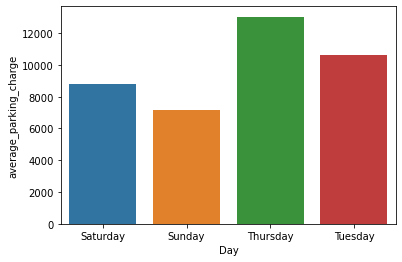

In [17]:
sns.barplot(data=mean, x ="Day", y = "average_parking_charge")

In [18]:
#Analysis on Saturday 
data_sat=data[data["Day"]== "Saturday"]

In [19]:
sum_sat=data_sat.groupby("Time")["parking_charges"].sum().reset_index()

In [20]:
sum_sat

,Time,parking_charges
0,10.00-11.00,93870
1,11.00-12.00,92610
2,12.00-13.00,95570
3,13.00-14.00,97250
4,14.00-15.00,90400
5,15.00-16.00,90190
6,16.00-17.00,86140
7,17.00-18.00,80240
8,18.00-19.00,86110
9,19.00-20.00,75010


Text(0.5, 1.0, 'SATURDAY')

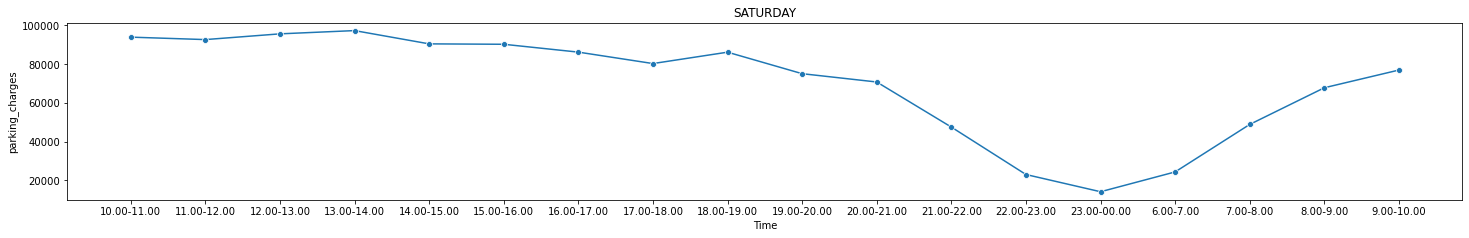

In [21]:
plt.figure(figsize=(25,15))
plt.subplot(4,1,1)
sns.lineplot(x='Time',y="parking_charges",marker='o',data=sum_sat)
plt.title("SATURDAY")

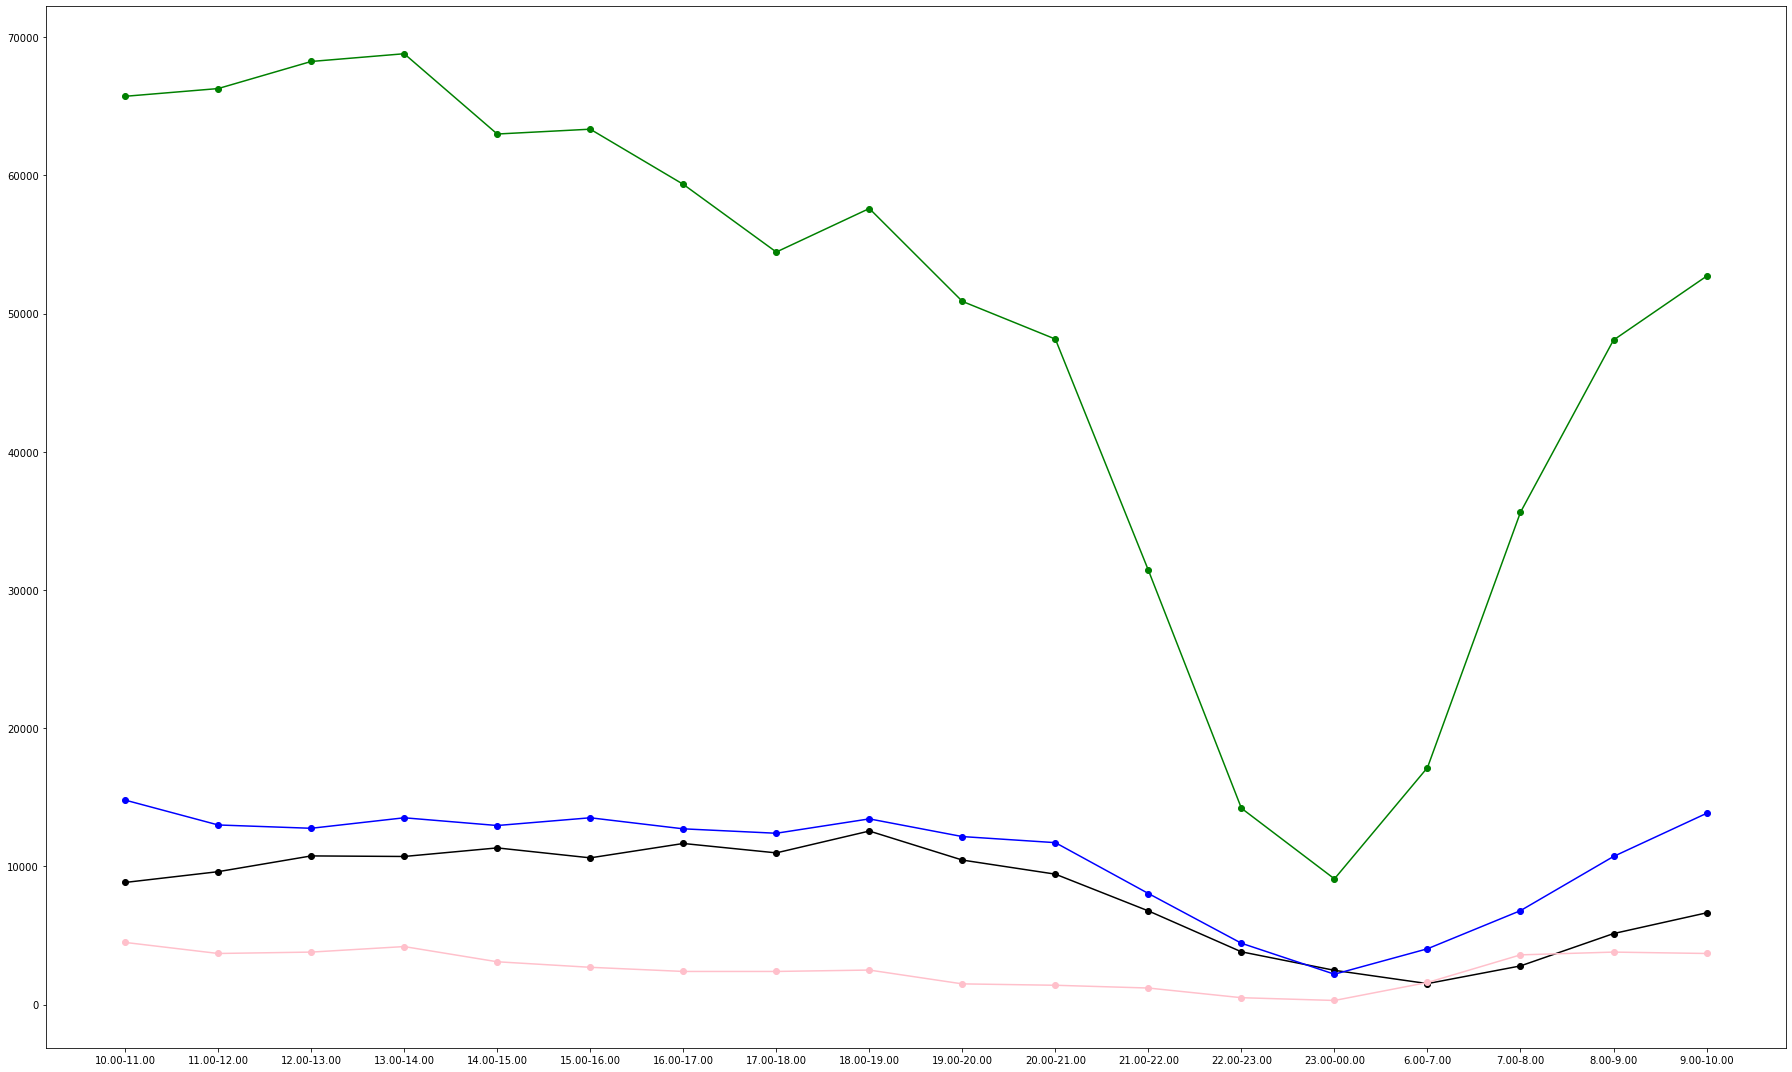

In [34]:
#VARIATION OF CHARGES FOR EACH VEHICLE ON SATURDAY
time_aggregated = data_sat.groupby('Time').sum()
plt.figure(figsize=(25,15))
plt.plot(time_aggregated.index, time_aggregated['Bike_charges'], marker='o', label='Bike Charges',color="black")
plt.plot(time_aggregated.index, time_aggregated['bus/lorry_charges'], marker='o', label='bus/Lorry Charges', color="pink")
plt.plot(time_aggregated.index, time_aggregated['Car_charges'], marker='o', label='Car Charges', color="green")
plt.plot(time_aggregated.index, time_aggregated['twheel_charges'], marker='o', label='twheel Charges', color="blue")
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


BIKE CHARGE IS BLACK,
BUS/LORRY IS PINK ,
CAR CHARGE IS GREEN &
TWHEEL CHARGE IS BLUE

Text(0.5, 1.0, 'SUNDAY')

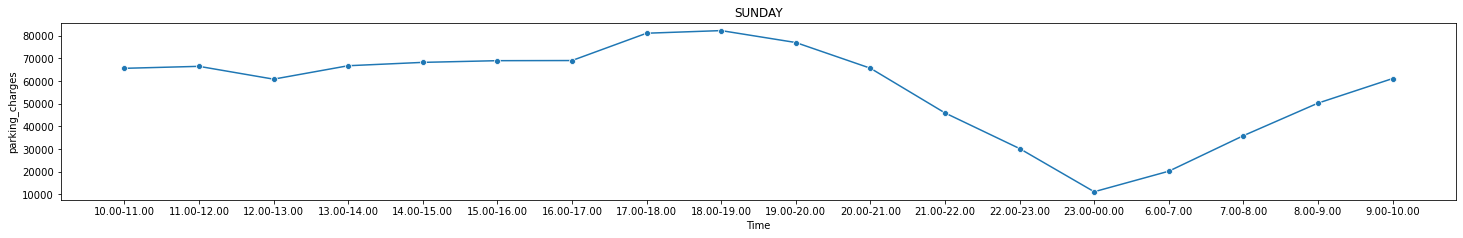

In [36]:
#Analysis on Sunday
data_sun=data[data["Day"]== "Sunday"]
sum_sun=data_sun.groupby("Time")["parking_charges"].sum().reset_index()
plt.figure(figsize=(25,15))
plt.subplot(4,1,1)
sns.lineplot(x='Time',y="parking_charges",marker='o',data=sum_sun)
plt.title("SUNDAY")

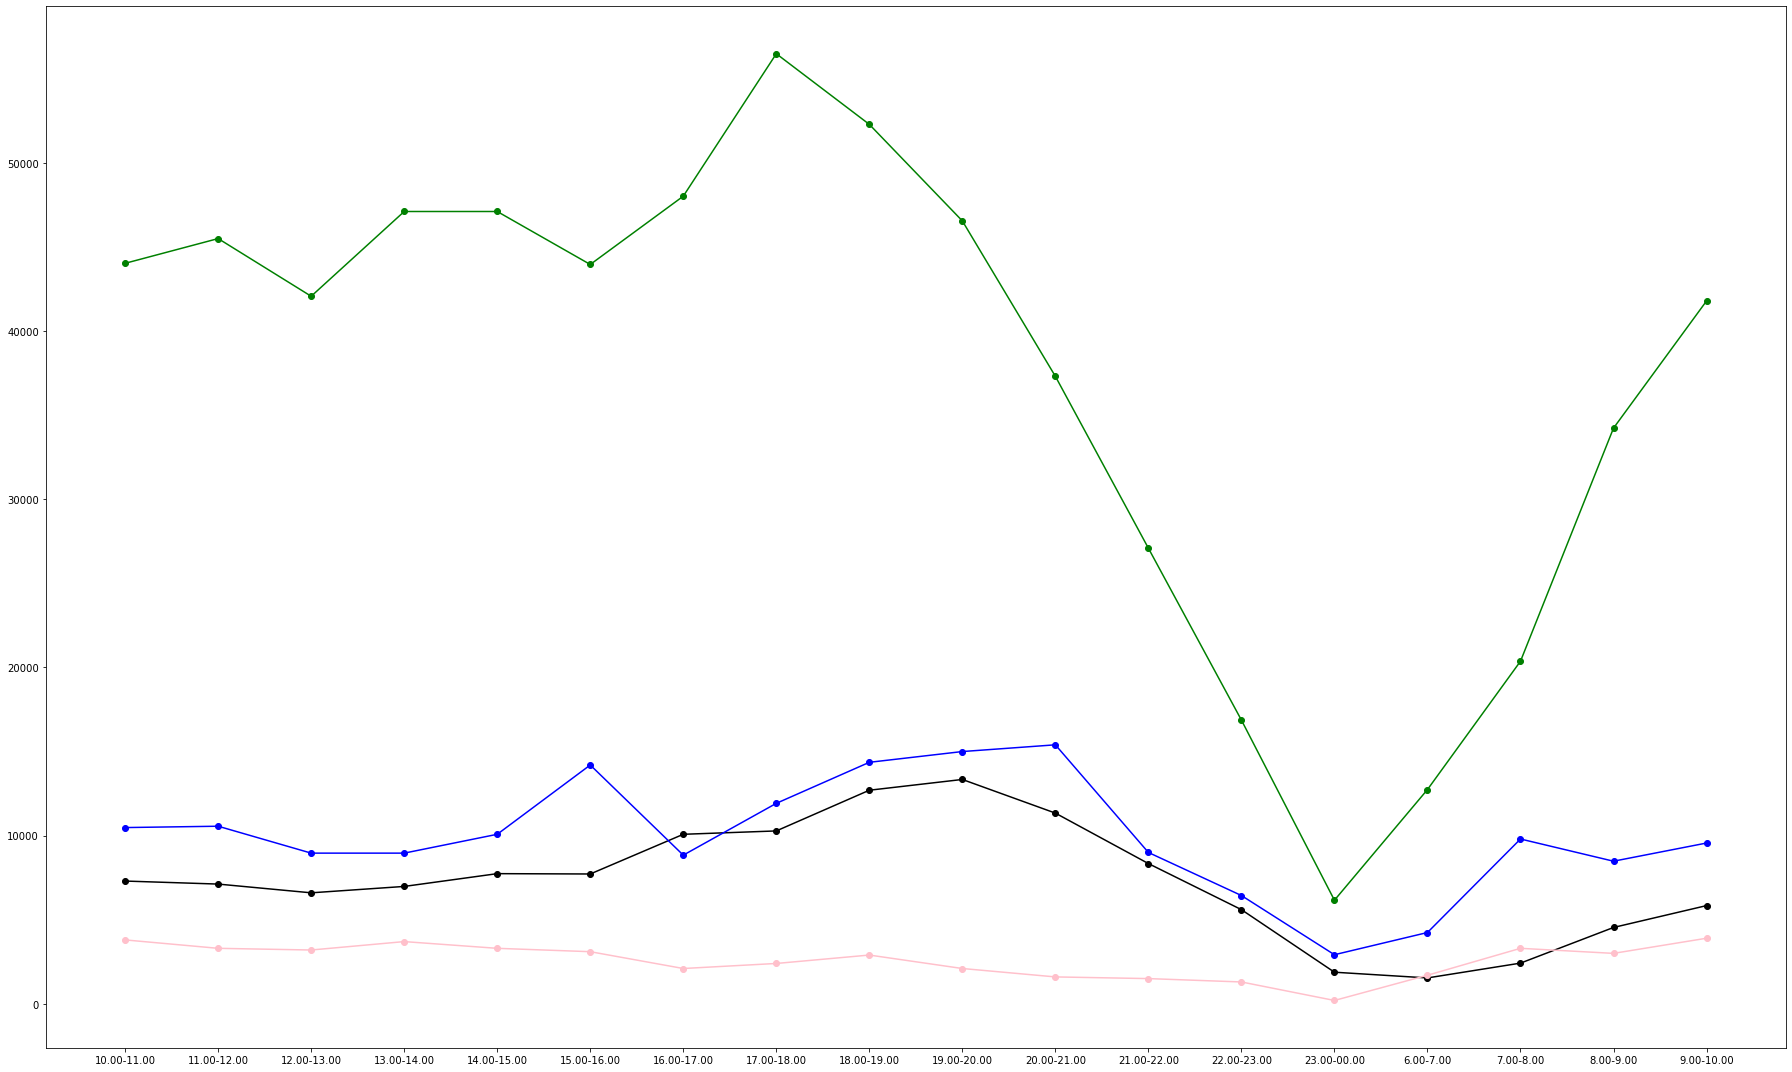

In [37]:
#VARIATION OF CHARGES FOR EACH VEHICLE ON SUNDAY
time_aggregated = data_sun.groupby('Time').sum()
plt.figure(figsize=(25,15))
plt.plot(time_aggregated.index, time_aggregated['Bike_charges'], marker='o', label='Bike Charges',color="black")
plt.plot(time_aggregated.index, time_aggregated['bus/lorry_charges'], marker='o', label='bus/Lorry Charges', color="pink")
plt.plot(time_aggregated.index, time_aggregated['Car_charges'], marker='o', label='Car Charges', color="green")
plt.plot(time_aggregated.index, time_aggregated['twheel_charges'], marker='o', label='twheel Charges', color="blue")
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


BIKE CHARGE IS BLACK, BUS/LORRY IS PINK , CAR CHARGE IS GREEN & TWHEEL CHARGE IS BLUE

Text(0.5, 1.0, 'TUESDAY')

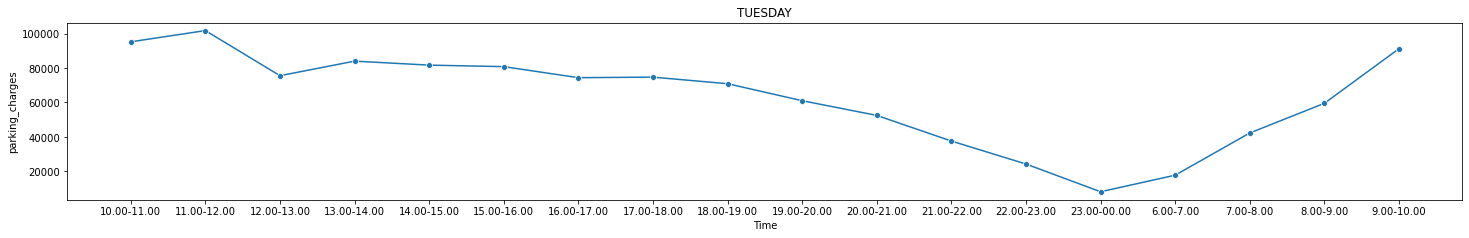

In [38]:
#Analysis on Tuesday
data_tue=data[data["Day"]== "Tuesday"]
sum_tue=data_tue.groupby("Time")["parking_charges"].sum().reset_index()
plt.figure(figsize=(25,15))
plt.subplot(4,1,1)
sns.lineplot(x='Time',y="parking_charges",marker='o',data=sum_tue)
plt.title("TUESDAY")

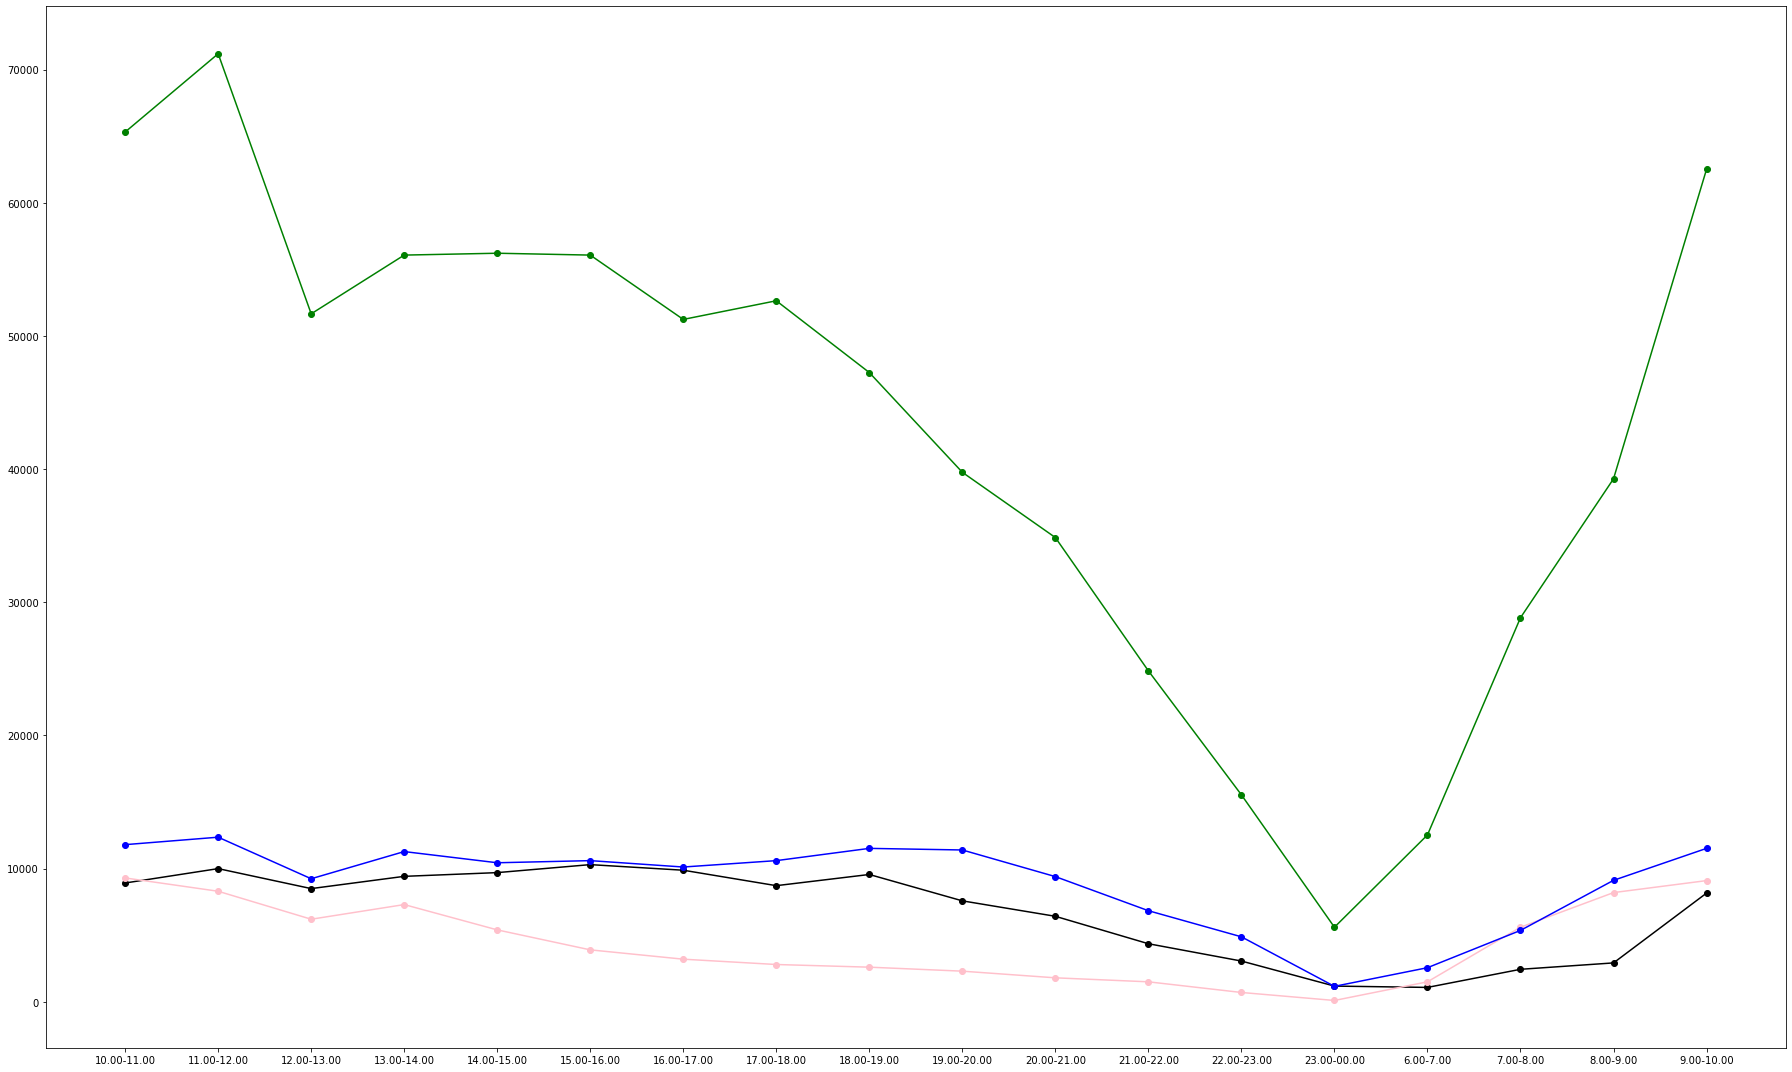

In [39]:
#VARIATION OF CHARGES FOR EACH VEHICLE ON TUESDAY
time_aggregated = data_tue.groupby('Time').sum()
plt.figure(figsize=(25,15))
plt.plot(time_aggregated.index, time_aggregated['Bike_charges'], marker='o', label='Bike Charges',color="black")
plt.plot(time_aggregated.index, time_aggregated['bus/lorry_charges'], marker='o', label='bus/Lorry Charges', color="pink")
plt.plot(time_aggregated.index, time_aggregated['Car_charges'], marker='o', label='Car Charges', color="green")
plt.plot(time_aggregated.index, time_aggregated['twheel_charges'], marker='o', label='twheel Charges', color="blue")
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

BIKE CHARGE IS BLACK, BUS/LORRY IS PINK , CAR CHARGE IS GREEN & TWHEEL CHARGE IS BLUE



Text(0.5, 1.0, 'THURSDAY')

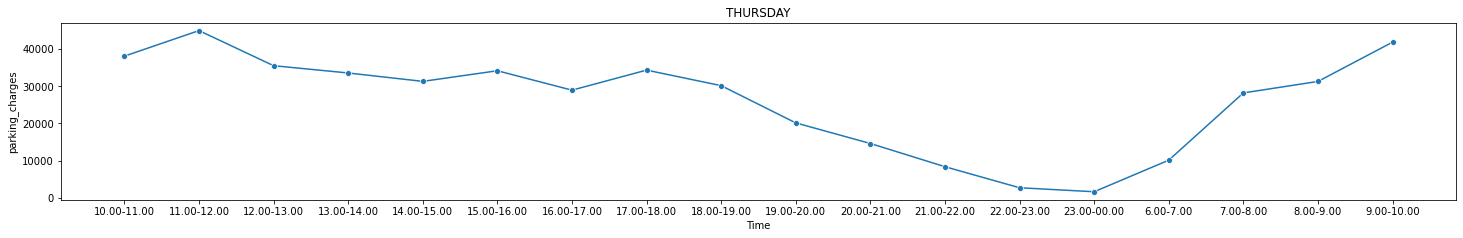

In [40]:
#Analysis on Thursday
data_thur=data[data["Day"]== "Thursday"]
sum_thur=data_thur.groupby("Time")["parking_charges"].sum().reset_index()
plt.figure(figsize=(25,15))
plt.subplot(4,1,1)
sns.lineplot(x='Time',y="parking_charges",marker='o',data=sum_thur)
plt.title("THURSDAY")

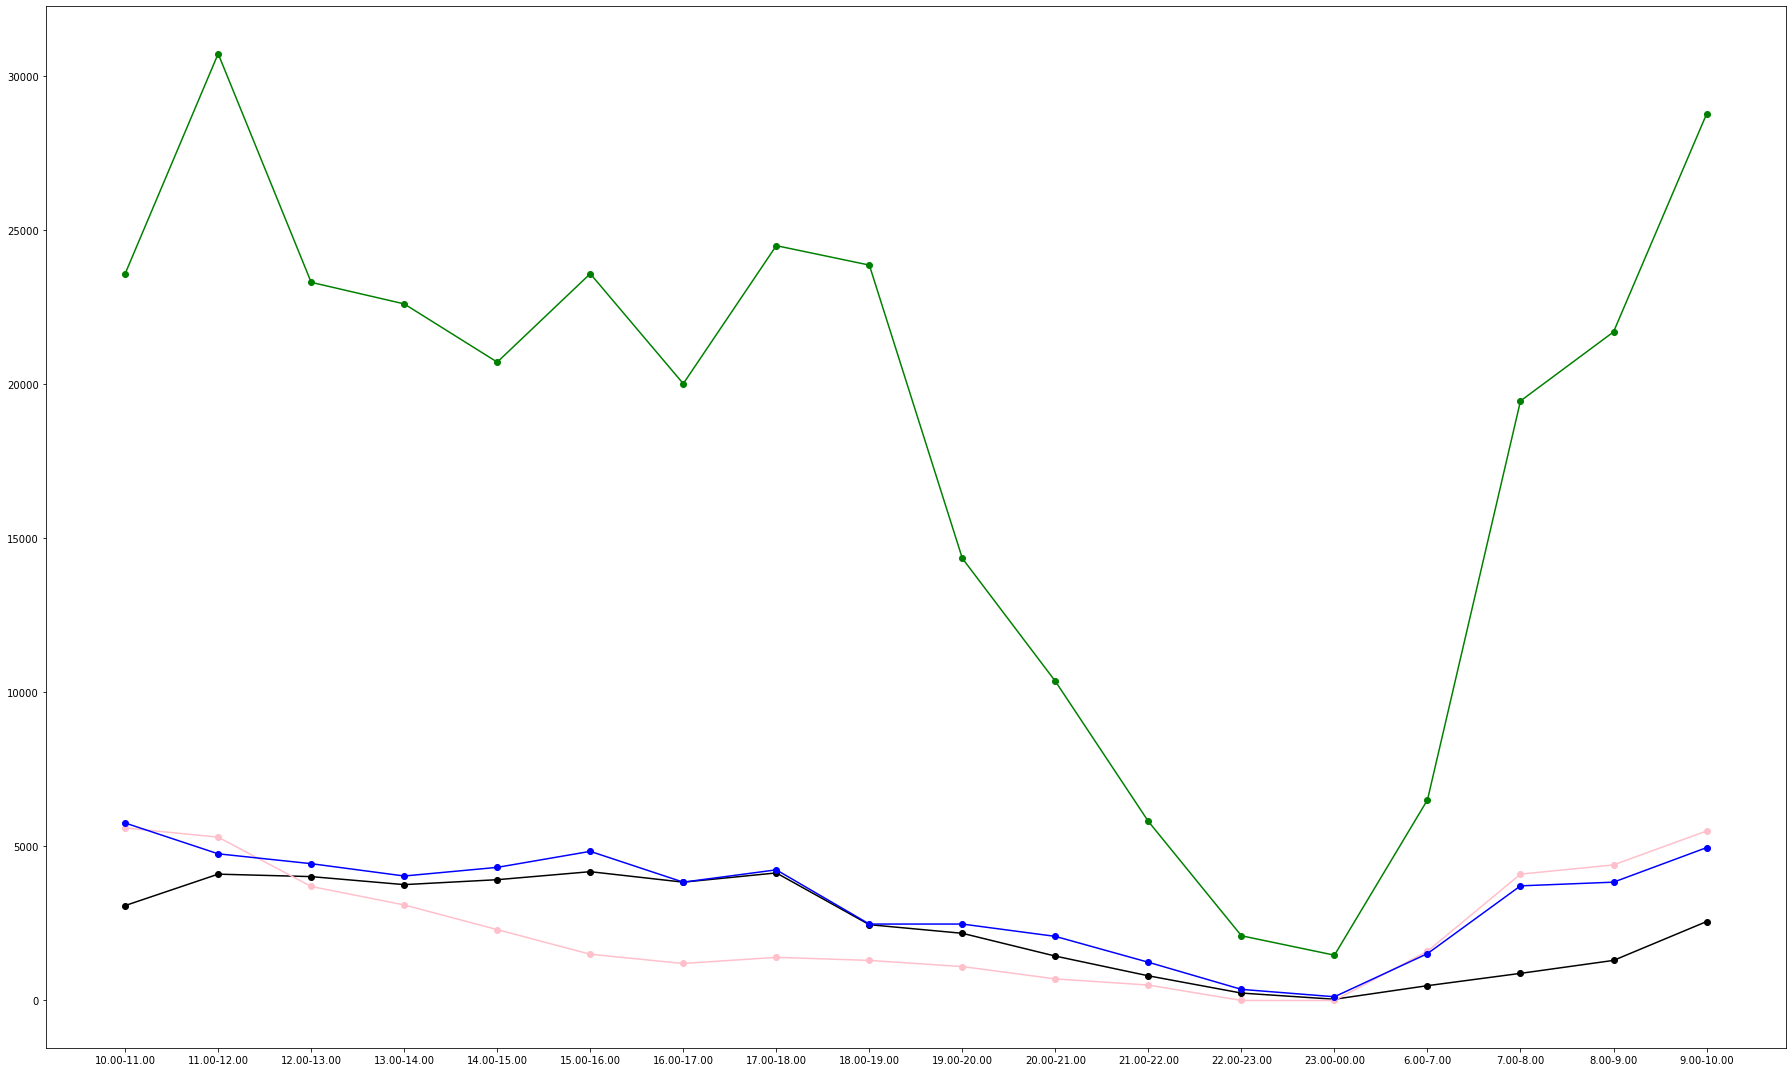

In [41]:
#VARIATION OF CHARGES FOR EACH VEHICLE ON THURSDAY
time_aggregated = data_thur.groupby('Time').sum()
plt.figure(figsize=(25,15))
plt.plot(time_aggregated.index, time_aggregated['Bike_charges'], marker='o', label='Bike Charges',color="black")
plt.plot(time_aggregated.index, time_aggregated['bus/lorry_charges'], marker='o', label='bus/Lorry Charges', color="pink")
plt.plot(time_aggregated.index, time_aggregated['Car_charges'], marker='o', label='Car Charges', color="green")
plt.plot(time_aggregated.index, time_aggregated['twheel_charges'], marker='o', label='twheel Charges', color="blue")
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

BIKE CHARGE IS BLACK, BUS/LORRY IS PINK , CAR CHARGE IS GREEN & TWHEEL CHARGE IS BLUE

# REGRESSION TO PREDICT THE PARKING CHARGE

In [84]:
data.head()

,Date,Day,Time,Bike,T.Wheel,Car,Bus/lorry,Section,hours_difference,parking_charges,Bike_charges,Car_charges,twheel_charges,bus/lorry_charges
0,13/9/2022,Tuesday,6.00-7.00,0,0,0,0,1,1,0,0,0,0,0
1,13/9/2022,Tuesday,7.00-8.00,18,29,33,0,1,1,3830,360,2310,1160,0
2,13/9/2022,Tuesday,8.00-9.00,9,20,26,0,1,1,2800,180,1820,800,0
3,13/9/2022,Tuesday,9.00-10.00,24,35,46,0,1,1,5100,480,3220,1400,0
4,13/9/2022,Tuesday,10.00-11.00,26,31,47,0,1,1,5050,520,3290,1240,0


In [85]:
grouped = data.groupby(['Day', 'Section']).sum().reset_index()

In [86]:
grouped

,Day,Section,Bike,T.Wheel,Car,Bus/lorry,hours_difference,parking_charges,Bike_charges,Car_charges,twheel_charges,bus/lorry_charges
0,Saturday,1,1667,782,1423,29,18,167130,33340,99610,31280,2900
1,Saturday,2,808,650,1343,51,18,141270,16160,94010,26000,5100
2,Saturday,3,894,467,2282,99,18,206200,17880,159740,18680,9900
3,Saturday,4,1594,613,1923,38,18,194810,31880,134610,24520,3800
4,Saturday,5,462,440,1266,39,18,119360,9240,88620,17600,3900
5,Saturday,6,539,576,2366,73,18,206740,10780,165620,23040,7300
6,Saturday,7,764,880,1128,93,17,138740,15280,78960,35200,9300
7,Saturday,8,581,419,758,47,18,86140,11620,53060,16760,4700
8,Sunday,1,1869,1033,1608,23,18,193560,37380,112560,41320,2300
9,Sunday,2,529,350,850,33,18,87380,10580,59500,14000,3300


In [87]:
#SPLIT THE DAY INTO FOUR COLUMNS AND INSERT DUMMY VARIABLES

In [88]:
def cleaner1(grouped):
    if grouped["Day"]=="Saturday":
        return 1
    else:
        return 0
    
grouped["Saturday"]= grouped.apply(cleaner1, axis=1)

In [89]:
def cleaner1(grouped):
    if grouped["Day"]=="Sunday":
        return 1
    else:
        return 0
    
grouped["Sunday"]= grouped.apply(cleaner1, axis=1)

In [90]:
def cleaner1(grouped):
    if grouped["Day"]=="Thursday":
        return 1
    else:
        return 0
    
grouped["Thursday"]= grouped.apply(cleaner1, axis=1)

In [91]:
def cleaner1(grouped):
    if grouped["Day"]=="Tuesday":
        return 1
    else:
        return 0
    
grouped["Tuesday"]= grouped.apply(cleaner1, axis=1)

In [92]:
grouped

,Day,Section,Bike,T.Wheel,Car,Bus/lorry,hours_difference,parking_charges,Bike_charges,Car_charges,twheel_charges,bus/lorry_charges,Saturday,Sunday,Thursday,Tuesday
0,Saturday,1,1667,782,1423,29,18,167130,33340,99610,31280,2900,1,0,0,0
1,Saturday,2,808,650,1343,51,18,141270,16160,94010,26000,5100,1,0,0,0
2,Saturday,3,894,467,2282,99,18,206200,17880,159740,18680,9900,1,0,0,0
3,Saturday,4,1594,613,1923,38,18,194810,31880,134610,24520,3800,1,0,0,0
4,Saturday,5,462,440,1266,39,18,119360,9240,88620,17600,3900,1,0,0,0
5,Saturday,6,539,576,2366,73,18,206740,10780,165620,23040,7300,1,0,0,0
6,Saturday,7,764,880,1128,93,17,138740,15280,78960,35200,9300,1,0,0,0
7,Saturday,8,581,419,758,47,18,86140,11620,53060,16760,4700,1,0,0,0
8,Sunday,1,1869,1033,1608,23,18,193560,37380,112560,41320,2300,0,1,0,0
9,Sunday,2,529,350,850,33,18,87380,10580,59500,14000,3300,0,1,0,0


In [93]:
grouped = grouped.drop(['hours_difference','Bike_charges','Car_charges', 'twheel_charges' ,'bus/lorry_charges', "Day"], axis=1)

<AxesSubplot:>

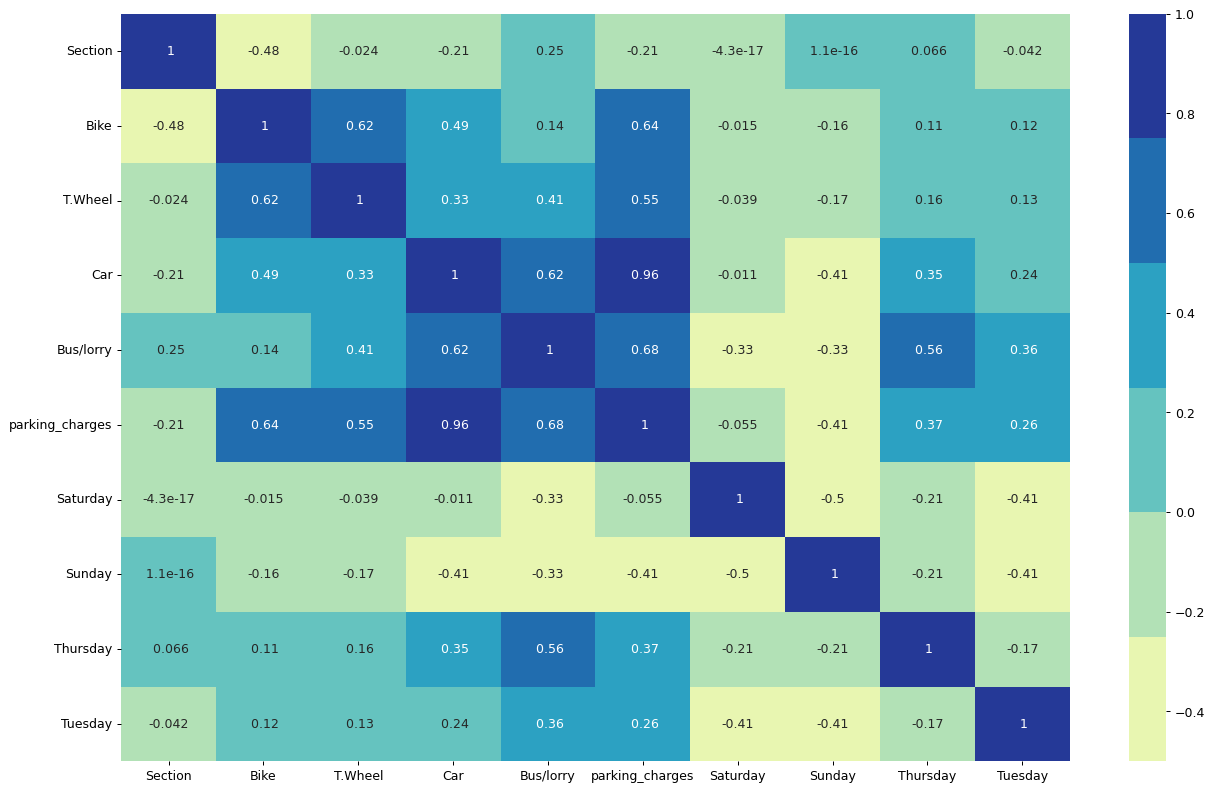

In [94]:
figure=plt.figure(figsize=(17,11) , dpi=90)
sns.heatmap(grouped.corr() , annot=True , fmt=" .2g" , cmap=sns.color_palette("YlGnBu"))

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(grouped.drop(['parking_charges'],axis=1), 
                                                    grouped['parking_charges'], 
                                                 test_size=0.2, 
                                                 random_state=111255)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
model_LR = LinearRegression()
model_DT = DecisionTreeRegressor()
model_RF = RandomForestRegressor()
model_XGB = xgboost.XGBRegressor()

In [98]:
model_LR.fit(x_train, y_train)
model_DT.fit(x_train, y_train)
model_RF.fit(x_train, y_train)
model_XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
regressors = [
    
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    XGBRegressor()
]

C:\Users\fnafh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


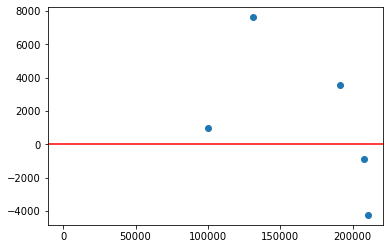

RandomForestRegressor()
	Explained variance: 0.9910904920323234
	Mean absolute error: 3451.5
	R2 score: 0.9899771566203076



C:\Users\fnafh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


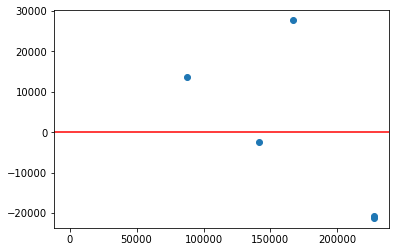

DecisionTreeRegressor()
	Explained variance: 0.7969313829867214
	Mean absolute error: 17130.0
	R2 score: 0.7967141137638319



C:\Users\fnafh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


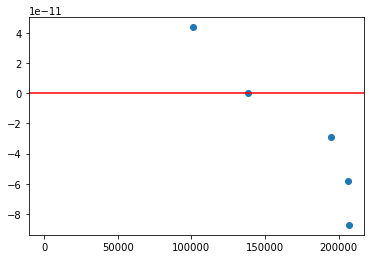

LinearRegression()
	Explained variance: 1.0
	Mean absolute error: 4.3655745685100555e-11
	R2 score: 1.0



C:\Users\fnafh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


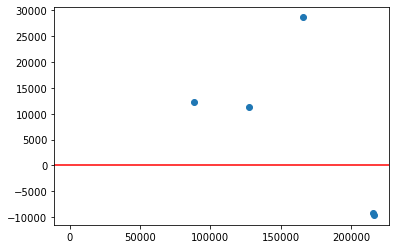

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
	Explained variance: 0.8830955956368977
	Mean absolute error: 14223.2671875
	R2 score: 0.8581663436714666



In [100]:
head = 10
for model in regressors[:head]:
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    residuals = y_test-y_pred
    plt.scatter(y_pred, residuals)
    p = sns.lineplot([10,35],[0,0],color='blue')
    plt.axhline(y=0, color="red" , linestyle="-")
    plt.show()
    
       
    print(model)
    
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()